In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
%matplotlib inline





In [3]:
df= pd.read_csv("data.csv")


In [ ]:
df.head(5)

In [ ]:
df.info()

In [6]:
cancer_df = df.drop(columns=(['Unnamed: 32']))

In [7]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
cancer_df.shape

(569, 32)

In [9]:
cancer_df.isna().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [10]:
cancer_df.describe(include="O")

,diagnosis
count,569
unique,2
top,B
freq,357


In [11]:
diagnosis_count = cancer_df['diagnosis'].value_counts()

In [12]:
diagnosis_count

diagnosis
B    357
M    212
Name: count, dtype: int64

In [13]:
cancer_df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

<Axes: ylabel='diagnosis_count'>

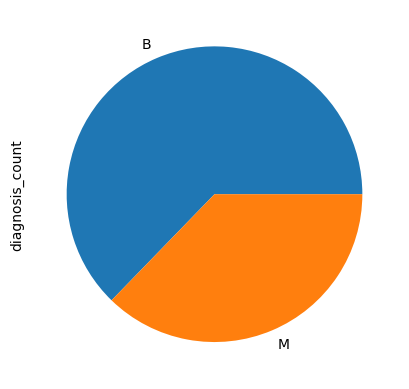

In [14]:
# plt.figure(figsize = (8,7))
# sns.countplot(x="diagnosis", data=cancer_df, palette='magma')
diagnosis_count.plot(kind = 'pie', xlabel='diagnosis', ylabel = 'diagnosis_count')

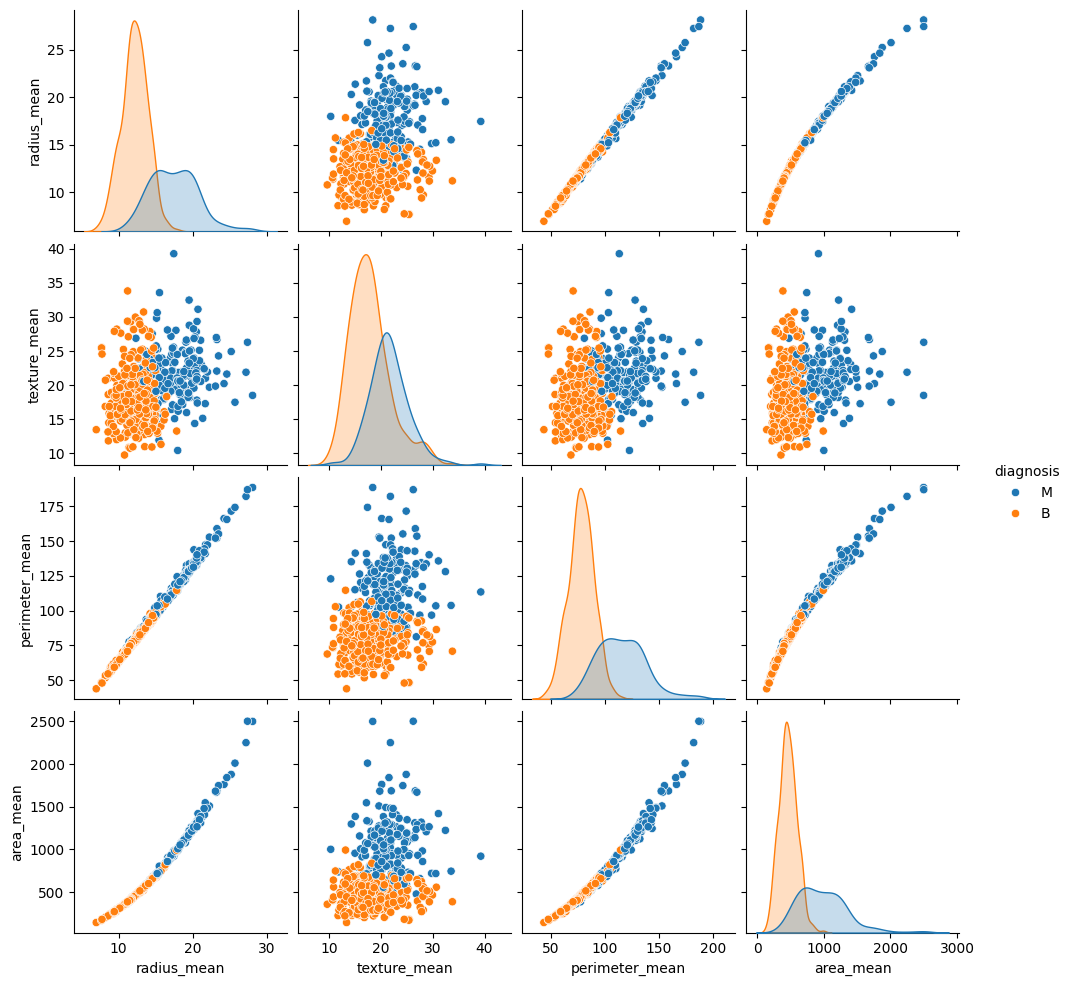

In [15]:
cols = ["diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean"]

sns.pairplot(cancer_df[cols], hue="diagnosis")
plt.show()

In [16]:
# to transform categorical data (target'y') into numbers that can be easily represented
labelencoder_y = LabelEncoder()
cancer_df.diagnosis = labelencoder_y.fit_transform(cancer_df.diagnosis)

In [17]:
cancer_df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<Axes: >

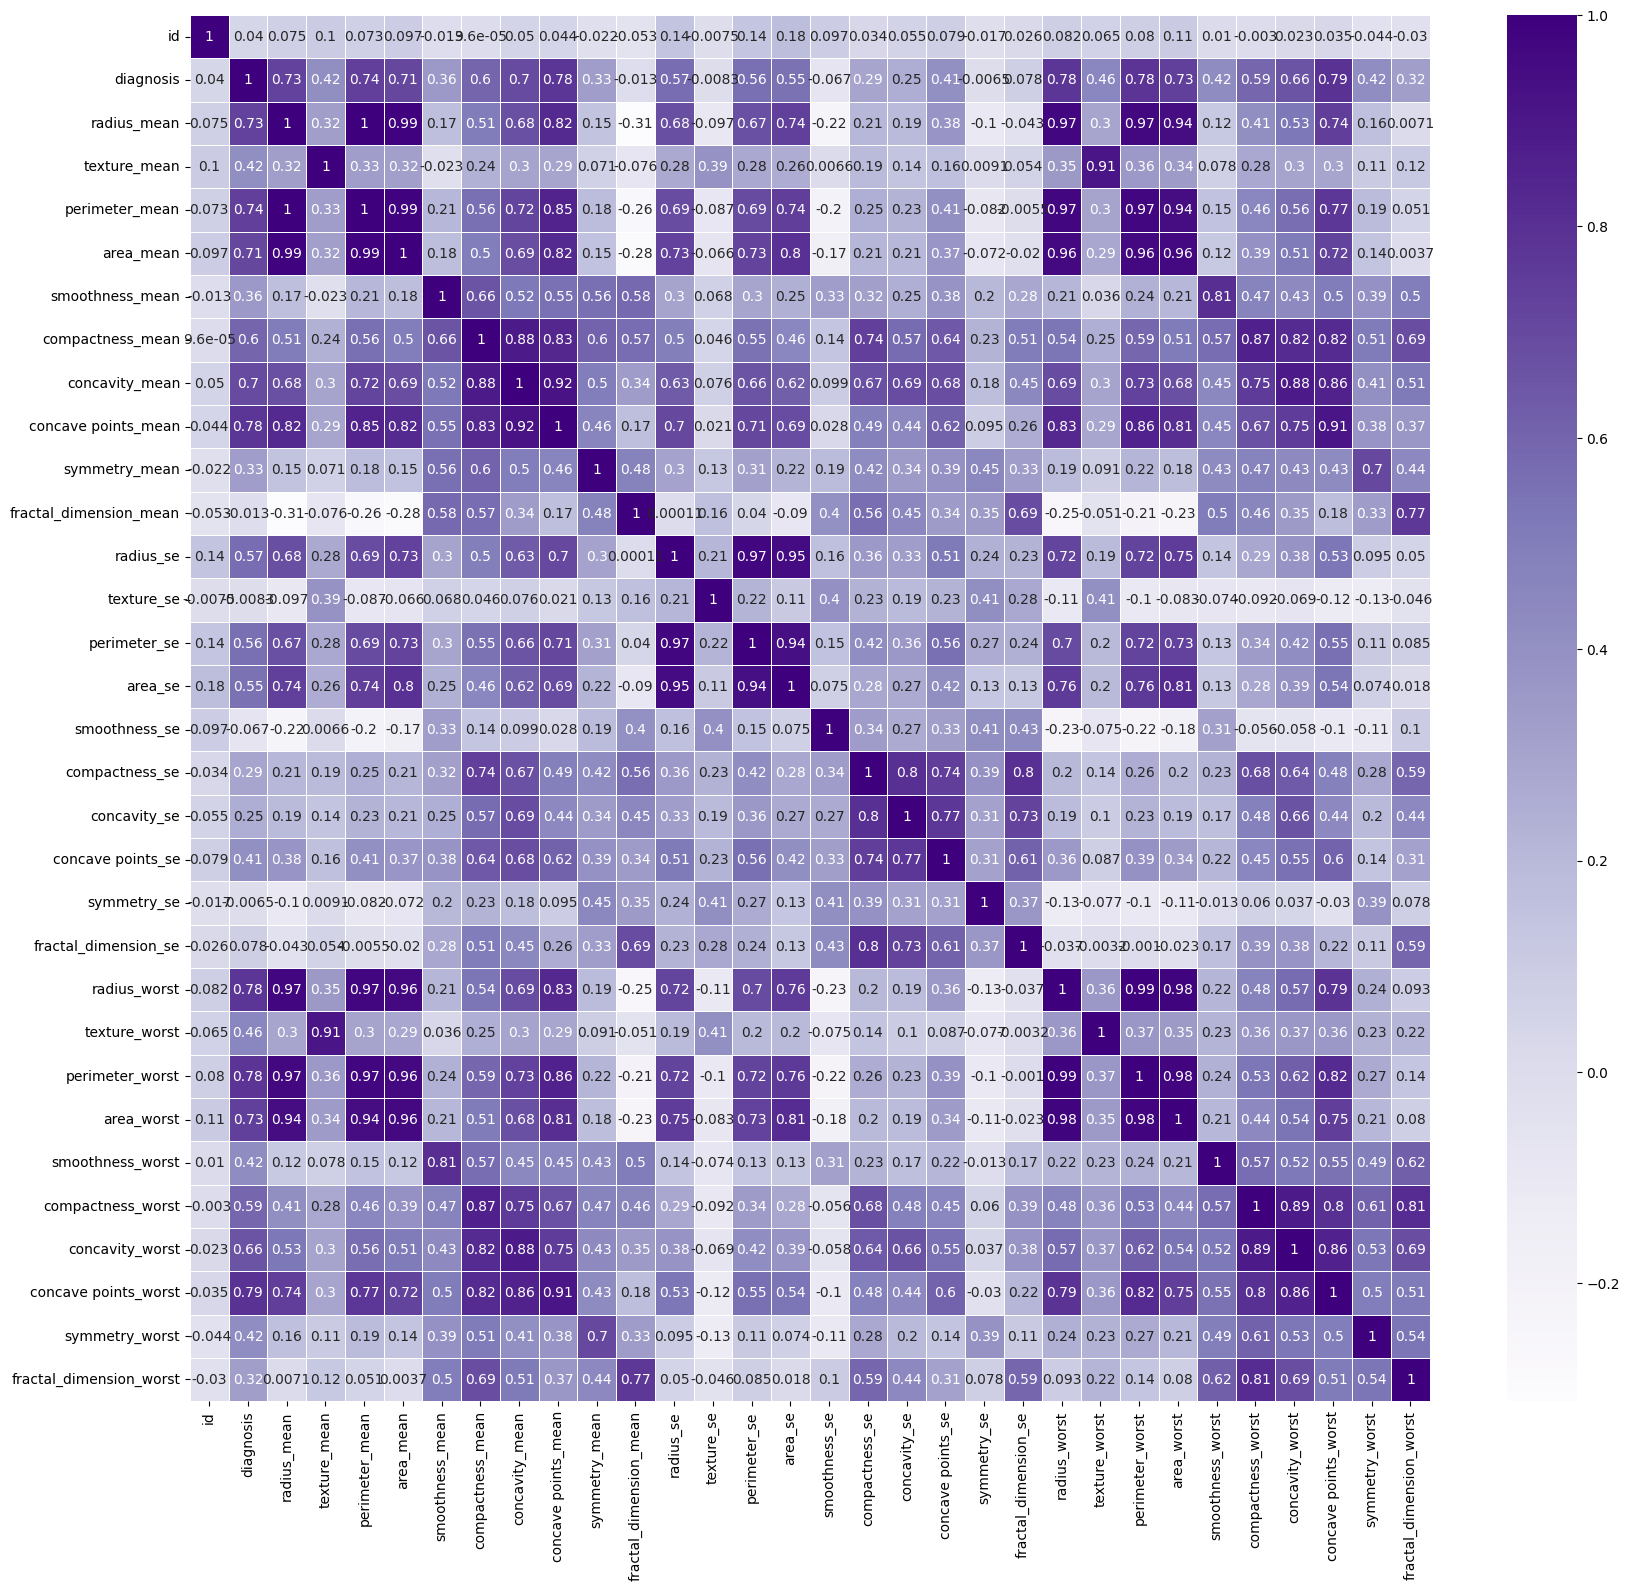

In [18]:
plt.figure(figsize=(20,18))
sns.heatmap(cancer_df.corr(), annot=True,linewidths=.5, cmap="Purples")

In [19]:
x = cancer_df.drop(columns=['id', 'diagnosis','radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'texture_mean','smoothness_mean', 'concavity_mean', 'fractal_dimension_mean',]).values


In [31]:
X_features = pd.DataFrame(x, columns= [ "radius_mean",  'perimeter_mean', 'area_mean', 'symmetry_mean', 'compactness_mean', 'concave points_mean']).values

In [32]:
y_target = cancer_df['diagnosis'].values

In [33]:
x_train,x_test,y_train,y_test = train_test_split(X_features,y_target,train_size=.7)

In [34]:
ss = StandardScaler()
X_train = ss.fit_transform(x_train)
X_test = ss.fit_transform(x_test)

In [35]:
model = SVC(kernel="rbf")

In [36]:
model.fit(x_train,y_train)

SVC()

In [37]:
y_predict= model.predict(x_test)

In [38]:
acc_score =accuracy_score(y_test,y_predict)

In [39]:
acc_score

0.847953216374269

In [40]:
df_data=pd.Series([17.99,122.80,1001.0,0.11840,0.27760,0.14710])
xdata = df_data.values.reshape(1,-1)

In [41]:
model.predict(xdata)

array([1])

In [ ]:
Confusion_Matrix = confusion_matrix(y_test, y_predict)
classification_report = classification_report(y_test, y_predict)